# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión logística: Lección 2**
### **Preprocesado**

In [1]:
# Tratamiento de datos
# -------------------------
import numpy as np
import pandas as pd

# Gráficos
# -------------------------
import matplotlib.pyplot as plt
import seaborn as sns

#  Gestión de warnings
# -------------------------
import warnings
warnings.filterwarnings("ignore")

# Estandarización variables numéricas y Codificación variables categóricas
# -------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# Gestión datos desbalanceados
# -------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
# -------------------------
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = None

Usando el mismo dataset que usatéis ayer, los objetivos de los ejercicios de hoy son:
- Estandarizar las variables numéricas de vuestro set de datos


In [2]:
df = pd.read_pickle('../datos/datos-regresion-logistica/1-invistico_airline_limpio.pkl')
df.head()

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on_board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,age,flight_distance,departure_delay_in_minutes
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,2,2,4,2,3,3,0,3,5,3,2,65,265,0
1,satisfied,Male,Loyal Customer,Personal Travel,Business,0,0,0,3,0,2,2,3,4,4,4,2,3,2,47,2464,310
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,2,0,2,2,3,3,4,4,4,2,15,2138,0
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,3,4,3,1,1,0,1,4,1,3,60,623,0
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,4,3,4,2,2,0,2,4,2,5,70,354,0


> ### Estandarizamos las predictoras numéricas con el método Standard Scaler

In [3]:
# Realizamos la estandarización con Standard Scaler ya que no queremos reducir los efectos de los outliers.
# Cómo explicamos en el pair anterior, son muy poquitos y los consideramos una parte relevante en nuestro modelo.

numericas = df.select_dtypes(include = np.number)

scaler = StandardScaler()
scaler.fit(numericas)
num_estandar = scaler.transform(numericas)
numericas_estandarizadas = pd.DataFrame(num_estandar, columns = numericas.columns)
numericas_estandarizadas.head(2)


,age,flight_distance,departure_delay_in_minutes
0,1.691351,-1.671103,-0.386481
1,0.500820,0.469852,7.756204


In [4]:
# Eliminamos las columnas numéricas originales y unimos el dataframe estandarizado con el original

df.drop(["age", "flight_distance", "departure_delay_in_minutes"], axis = 1, inplace=True)
df = pd.concat([df, numericas_estandarizadas], axis = 1)
df.head()

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on_board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,age,flight_distance,departure_delay_in_minutes
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,2,2,4,2,3,3,0,3,5,3,2,1.691351,-1.671103,-0.386481
1,satisfied,Male,Loyal Customer,Personal Travel,Business,0,0,0,3,0,2,2,3,4,4,4,2,3,2,0.500820,0.469852,7.756204
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,2,0,2,2,3,3,4,4,4,2,-1.615680,0.152458,-0.386481
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,3,4,3,1,1,0,1,4,1,3,1.360648,-1.322552,-0.386481
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,4,3,4,2,2,0,2,4,2,5,2.022054,-1.584452,-0.386481


- Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.


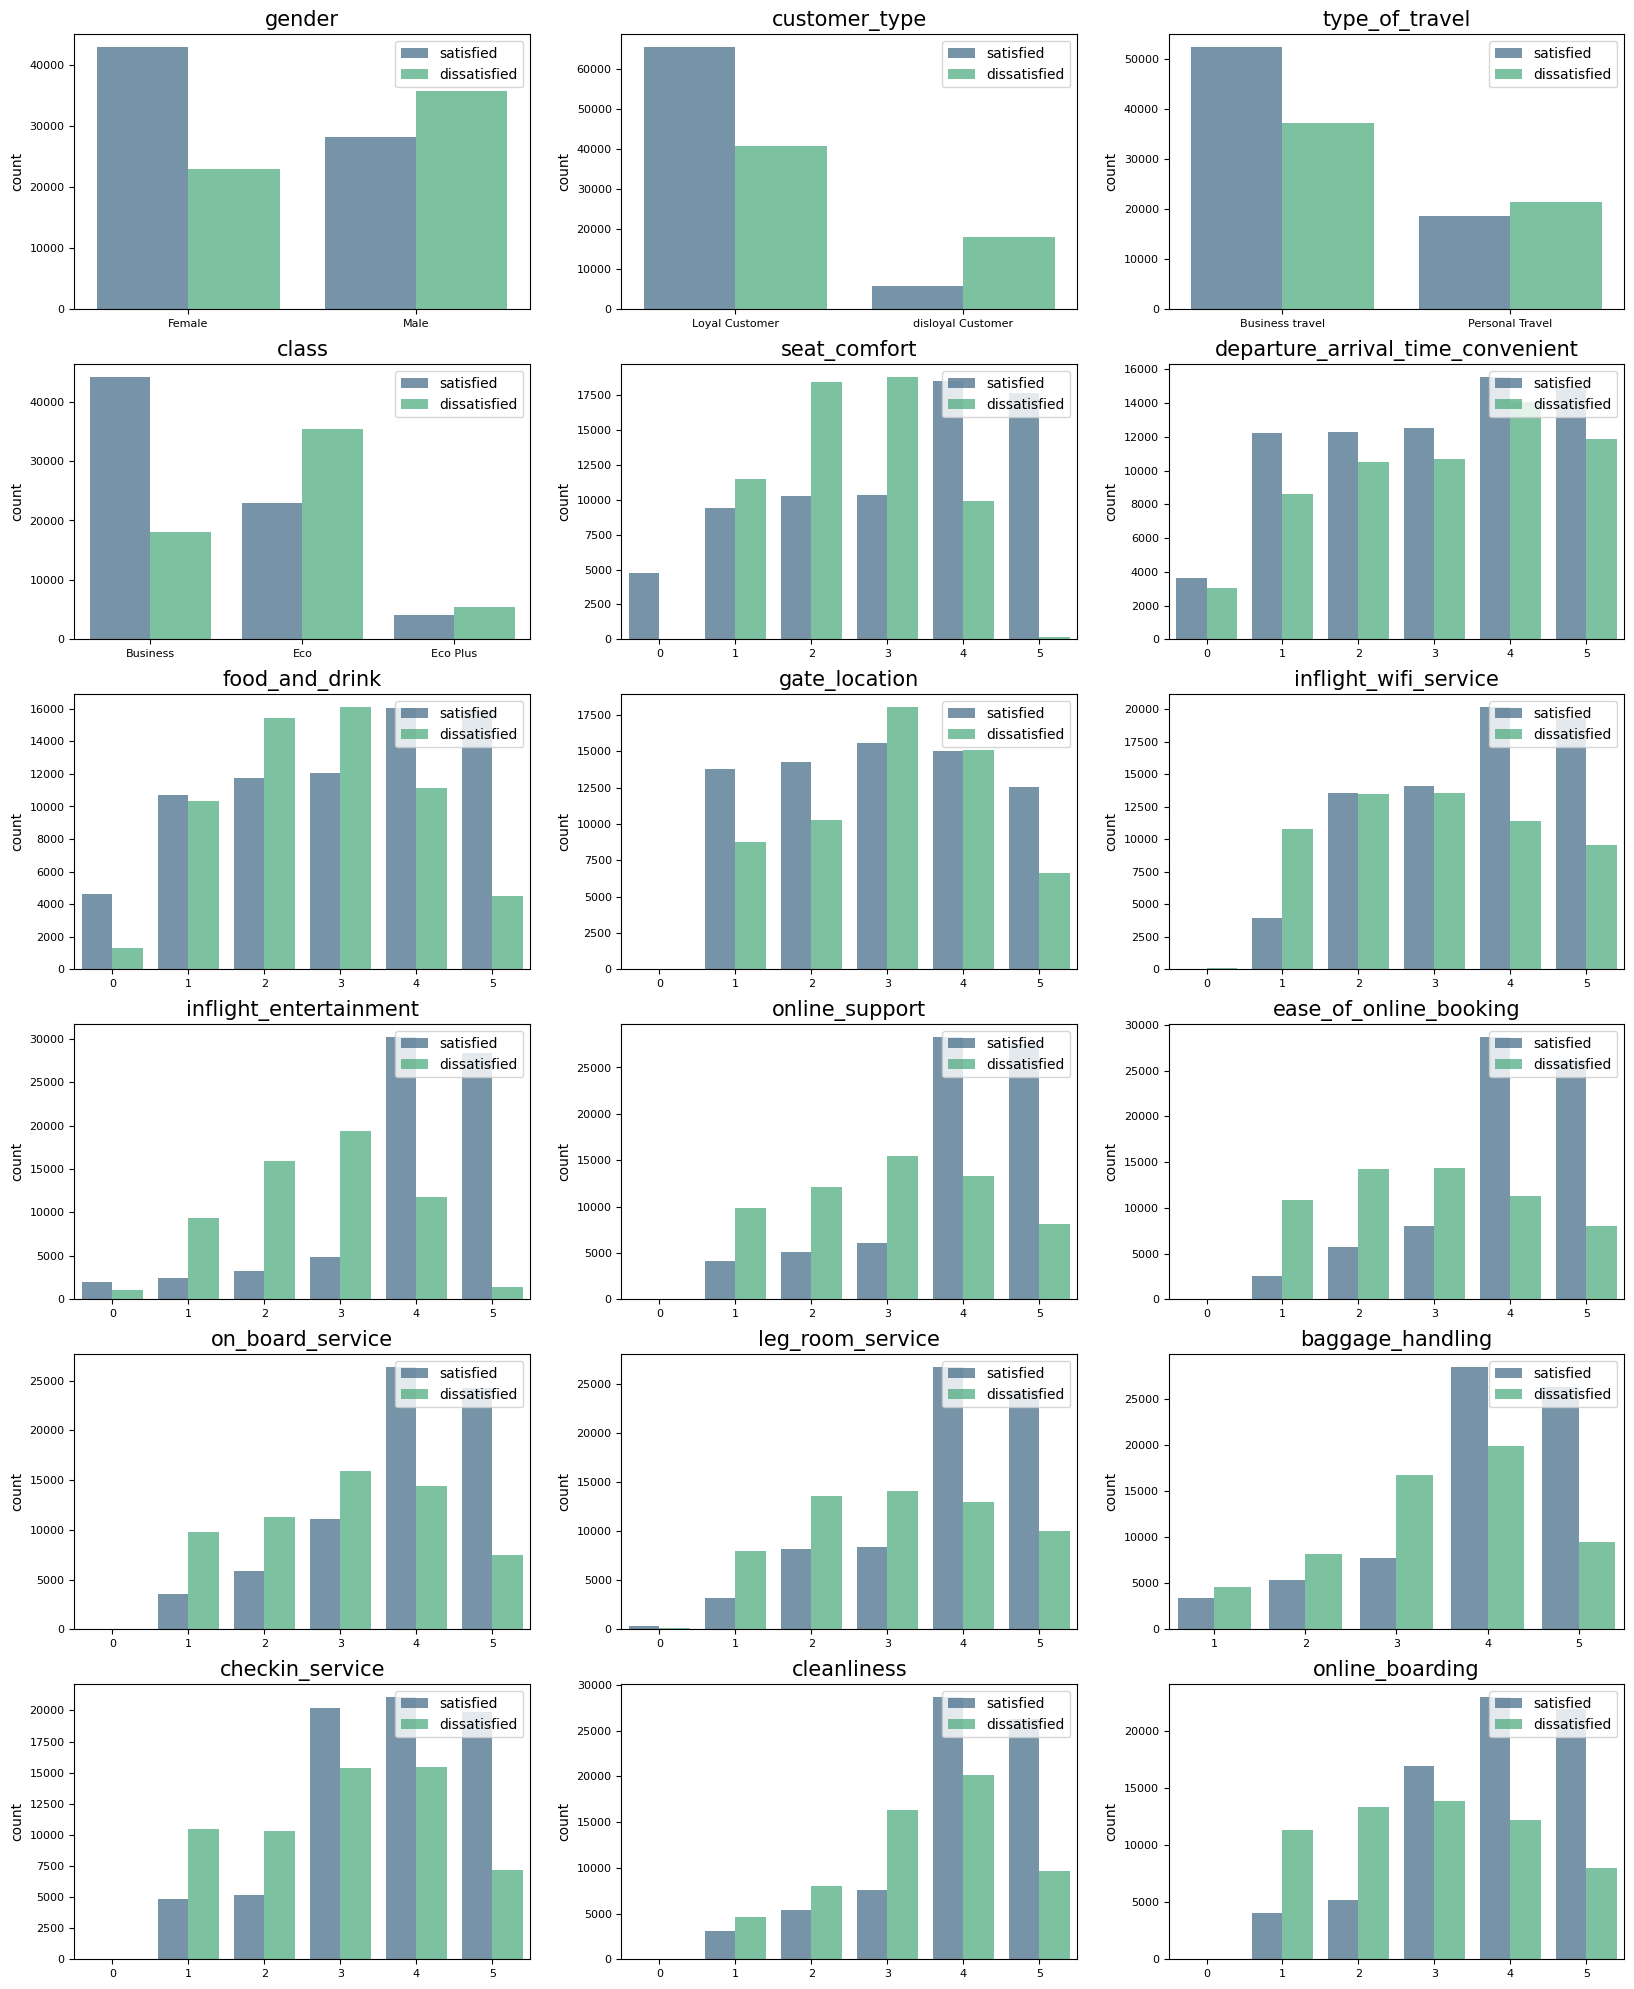

In [5]:
# Recordamos nuestras variables categóricas:

fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (20, 25))

axes = axes.flat
categoricas = df.select_dtypes(include = "category").columns

for i, colum in enumerate(categoricas): 
    sns.countplot(data = df, x = colum, hue = "satisfaction", alpha = 0.7, ax = axes[i], palette = "viridis")    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "light")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

> Como podemos ver, todas nuestras variables tienen algún tipo de orden:
>
> - Las cuatro primeras ('gender', 'customer_type', 'type_of_travel', 'class') nos hablan del perfil del cliente, y vemos claras diferencias entre las distintas categorías que componen cada variable.
>
> - Las catorce siguientes ('seat_comfort', 'departure_arrival_time_convenient', 'food_and_drink', 'gate_location', 'inflight_wifi_service', 'inflight_entertainment', 'online_support', 'ease_of_online_booking', 'on_board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding') nos hablan del nivel de satisfacción en referencia a distintos aspectos del servicio prestado por la aerolínea, y, como era de esperar, cada categoría nos indica un nivel de satisfacción diferente, por lo que también son variables ordinales.

> ### Decidimos por lo tanto realizar el método OrdinalEncoder a todas nuestras variables categóricas:

In [6]:
def ordinal_encoder1(df, columna):
    """Esta función toma un dataframe y una de sus columnas y realiza un encoding ordinal, 
    creando una nueva columna.

    Args:
        df (dataframe): el dataframe que contiene la columna.
        columna (serie): la columna la que se desea realizar el encoding.

    Returns:
        Un dataframe con una columna nueva fruto del encoding.
    """
    
    ordinal = OrdinalEncoder(dtype = int)

    transformados_oe = ordinal.fit_transform(df[[columna]])

    oe_df = pd.DataFrame(transformados_oe)

    oe_df.columns = ordinal.feature_names_in_

    columna += "_oe"
    
    df[columna] = oe_df
     
    return df

In [7]:
# Aplicamos el encoding a todas las columnas categóricas.

for col in categoricas:

    df = ordinal_encoder1(df, col)

In [8]:
df.sample(5)

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on_board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,age,flight_distance,departure_delay_in_minutes,gender_oe,customer_type_oe,type_of_travel_oe,class_oe,seat_comfort_oe,departure_arrival_time_convenient_oe,food_and_drink_oe,gate_location_oe,inflight_wifi_service_oe,inflight_entertainment_oe,online_support_oe,ease_of_online_booking_oe,on_board_service_oe,leg_room_service_oe,baggage_handling_oe,checkin_service_oe,cleanliness_oe,online_boarding_oe
69074,dissatisfied,Female,Loyal Customer,Business travel,Business,2,3,3,3,2,3,3,0,0,1,2,3,0,4,0.897663,-0.187330,-0.386481,0,0,0,0,2,3,3,3,2,3,3,0,0,1,1,3,0,4
82182,dissatisfied,Female,Loyal Customer,Business travel,Business,3,4,4,4,3,3,3,3,1,1,3,3,2,3,-0.954274,1.790059,0.033787,0,0,0,0,3,4,4,4,3,3,3,3,1,1,2,3,2,3
16264,satisfied,Female,Loyal Customer,Personal Travel,Eco,1,1,1,1,3,5,4,4,4,4,4,5,4,3,-0.623571,-0.540748,1.714857,0,0,1,1,1,1,1,1,3,5,4,4,4,4,3,5,4,3
84904,satisfied,Male,Loyal Customer,Business travel,Business,1,1,1,1,3,4,5,3,3,3,3,5,3,3,0.302398,1.207844,-0.386481,1,0,0,0,1,1,1,1,3,4,5,3,3,3,2,5,3,3
70387,dissatisfied,Male,Loyal Customer,Business travel,Business,2,1,1,1,2,2,2,4,4,1,2,2,1,2,0.368538,0.480562,0.086320,1,0,0,0,2,1,1,1,2,2,2,4,4,1,1,2,1,2


In [9]:
# Eliminamos las columnas categóricas originales

df.drop(categoricas, axis = 1, inplace = True)

In [10]:
df.sample(5)

,satisfaction,age,flight_distance,departure_delay_in_minutes,gender_oe,customer_type_oe,type_of_travel_oe,class_oe,seat_comfort_oe,departure_arrival_time_convenient_oe,food_and_drink_oe,gate_location_oe,inflight_wifi_service_oe,inflight_entertainment_oe,online_support_oe,ease_of_online_booking_oe,on_board_service_oe,leg_room_service_oe,baggage_handling_oe,checkin_service_oe,cleanliness_oe,online_boarding_oe
66021,dissatisfied,-0.755852,0.801851,0.217654,0,0,0,1,1,0,0,4,5,0,5,5,4,3,3,1,3,5
74179,dissatisfied,0.566960,0.792115,-0.386481,1,0,0,0,2,3,3,3,3,4,3,2,2,2,1,1,2,3
44769,dissatisfied,-1.086555,-0.707235,-0.386481,0,1,0,1,2,0,2,2,5,2,5,5,5,2,3,4,5,5
112632,satisfied,0.963804,0.617840,-0.386481,1,0,0,0,2,2,2,2,2,4,4,4,4,5,3,3,4,4
108174,satisfied,0.434679,-1.464699,-0.386481,0,0,0,0,4,4,4,4,5,4,5,4,4,4,3,4,4,4


> ### Por último, codificamos también nuestra variable respuesta

In [11]:
map_satisfaccion = {"dissatisfied": 0, "satisfied": 1}

df["satisfaction"] = df["satisfaction"].map(map_satisfaccion)
df.head(2)

,satisfaction,age,flight_distance,departure_delay_in_minutes,gender_oe,customer_type_oe,type_of_travel_oe,class_oe,seat_comfort_oe,departure_arrival_time_convenient_oe,food_and_drink_oe,gate_location_oe,inflight_wifi_service_oe,inflight_entertainment_oe,online_support_oe,ease_of_online_booking_oe,on_board_service_oe,leg_room_service_oe,baggage_handling_oe,checkin_service_oe,cleanliness_oe,online_boarding_oe
0,1,1.691351,-1.671103,-0.386481,0,0,1,1,0,0,0,2,2,4,2,3,3,0,2,5,3,2
1,1,0.500820,0.469852,7.756204,1,0,1,0,0,0,0,3,0,2,2,3,4,4,3,2,3,2


- Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.


In [12]:
# Chequeamos si los datos están balanceados o no para poder equiparar ambos valores.

df["satisfaction"].value_counts()

1    71087
0    58793
Name: satisfaction, dtype: int64

> Vemos que nuestros datos sufren un ligero desbalanceo, de aproximadamente el 10%, de modo que procedemos a corregirlo.

In [13]:
# Primero separamos nuestros datos:

X = df.drop("satisfaction", axis = 1)
y = df["satisfaction"]

In [14]:
# Utilizamos el SMOTE Tomek para corregir el balanceado dado que queremos generar datos parecidos 
# a los de la clase minoritaria

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

balanceo = SMOTETomek()

X_train_res, y_train_res = balanceo.fit_resample(X_train, y_train)

In [15]:
y_train.value_counts()

1    56778
0    47126
Name: satisfaction, dtype: int64

In [16]:
y_train_res.value_counts()

0    55806
1    55806
Name: satisfaction, dtype: int64

> Comprobamos que hemos podido balancear nuestros datos

In [17]:
# Unimos los dataframe balanaceados

df_balanceado_stomek = pd.concat([X_train_res, y_train_res], axis = 1)

In [18]:
df_balanceado_stomek.head()

,age,flight_distance,departure_delay_in_minutes,gender_oe,customer_type_oe,type_of_travel_oe,class_oe,seat_comfort_oe,departure_arrival_time_convenient_oe,food_and_drink_oe,gate_location_oe,inflight_wifi_service_oe,inflight_entertainment_oe,online_support_oe,ease_of_online_booking_oe,on_board_service_oe,leg_room_service_oe,baggage_handling_oe,checkin_service_oe,cleanliness_oe,online_boarding_oe,satisfaction
0,-0.028305,0.301419,-0.386481,1,0,0,0,3,1,1,1,2,3,4,3,3,3,2,4,3,3,0
1,-1.946383,-0.272034,0.926855,1,0,1,1,1,4,1,3,4,1,4,4,2,2,2,5,3,4,0
2,0.236257,-1.265110,-0.386481,0,0,1,1,4,4,3,4,1,4,3,5,5,3,4,2,5,4,1
3,-0.821993,-0.574825,-0.386481,0,1,0,0,0,0,0,2,5,0,5,5,4,4,4,3,4,5,1
4,0.765382,-0.516408,-0.386481,0,0,0,1,4,4,3,4,3,1,4,4,4,4,3,4,4,5,1


In [19]:
df_balanceado_stomek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111612 entries, 0 to 111611
Data columns (total 22 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   age                                   111612 non-null  float64
 1   flight_distance                       111612 non-null  float64
 2   departure_delay_in_minutes            111612 non-null  float64
 3   gender_oe                             111612 non-null  int64  
 4   customer_type_oe                      111612 non-null  int64  
 5   type_of_travel_oe                     111612 non-null  int64  
 6   class_oe                              111612 non-null  int64  
 7   seat_comfort_oe                       111612 non-null  int64  
 8   departure_arrival_time_convenient_oe  111612 non-null  int64  
 9   food_and_drink_oe                     111612 non-null  int64  
 10  gate_location_oe                      111612 non-null  int64  
 11  

- Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.

In [20]:
df_balanceado_stomek.to_pickle('../datos/datos-regresion-logistica/2-invistico_airline_procesado.pkl')
